# Trabalho 2


## 1. Realizar a importação dos dados utilizando o ucimlrepo


In [27]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # este import foi necessário por causa de um erro de SSL



In [28]:
list_available_datasets() # lista todos os datasets do ucimlrepo

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

## 2. Analizar o dataset, gerando visualizações


In [29]:
dataset = fetch_ucirepo(id=109) # dataset escolhido Wine

In [34]:
X = dataset.data.features # features
y = dataset.data.targets # labels
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
df = X.copy() # Copiando as features para pandas dataframe
df['target'] = y.values # Criando a coluna de target

In [63]:
print("\n1. DATASET OVERVIEW")
print("="*40)
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {len(X.columns)}")
print(f"Number of classes: {len(y['class'].unique())}")
print(f"Class distribution:\n{y['class'].value_counts()}")
print("\nFeature names:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")


1. DATASET OVERVIEW
Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class distribution:
class
2    71
1    59
3    48
Name: count, dtype: int64

Feature names:
 1. Alcohol
 2. Malicacid
 3. Ash
 4. Alcalinity_of_ash
 5. Magnesium
 6. Total_phenols
 7. Flavanoids
 8. Nonflavanoid_phenols
 9. Proanthocyanins
10. Color_intensity
11. Hue
12. 0D280_0D315_of_diluted_wines
13. Proline


In [66]:
# 2. Statistical Summary
print("\n2. STATISTICAL SUMMARY")
print("="*40)
print(X.describe())


2. STATISTICAL SUMMARY
          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.5

In [67]:
# 3. Create visualizations
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Wine Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

Text(0.5, 0.98, 'Wine Dataset - Exploratory Data Analysis')

<Figure size 2000x1500 with 0 Axes>

(np.float64(-1.0999921351876238),
 np.float64(1.0999991843382846),
 np.float64(-1.0999991992951486),
 np.float64(1.0999999618711975))

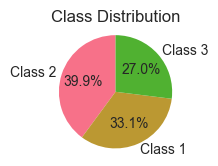

In [68]:
# 4.1 Class Distribution
plt.subplot(3, 3, 1)
class_counts = y['class'].value_counts()
plt.pie(class_counts, labels=[f'Class {i}' for i in class_counts.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5]),
 [Text(0.5, 0, 'Alcohol'),
  Text(2.5, 0, 'Ash'),
  Text(4.5, 0, 'Magnesium'),
  Text(6.5, 0, 'Flavanoids'),
  Text(8.5, 0, 'Proanthocyanins'),
  Text(10.5, 0, 'Hue'),
  Text(12.5, 0, 'Proline')])

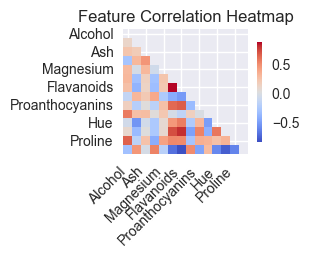

In [69]:
# 4.2 Correlation Heatmap
plt.subplot(3, 3, 2)
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Alcohol')

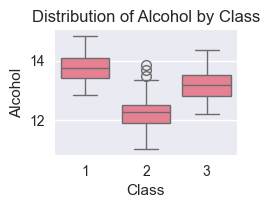

In [71]:
# 4.3 Boxplot of features by class
plt.subplot(3, 3, 3)
# Select a representative feature
feature_to_plot = 'Alcohol'  # You can change this to other features
sns.boxplot(x='target', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} by Class')
plt.xlabel('Class')
plt.ylabel(feature_to_plot)

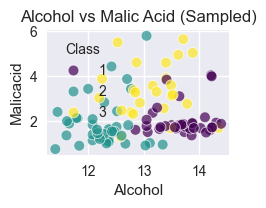

In [74]:
# 4.4 Pairplot of selected features (sampled for better visualization)
plt.subplot(3, 3, 4)
sample_df = df.sample(min(100, len(df)), random_state=42)
sns.scatterplot(data=sample_df, x='Alcohol', y='Malicacid', hue='target', 
                palette='viridis', s=60, alpha=0.7)
plt.title('Alcohol vs Malic Acid (Sampled)')
plt.legend(title='Class')

Text(0, 0.5, 'Frequency')

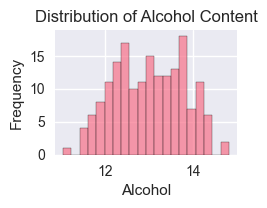

In [76]:
# 4.5 Feature distributions
plt.subplot(3, 3, 5)
X['Alcohol'].hist(bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Proline'),
  Text(1, 0, 'Magnesium'),
  Text(2, 0, 'Alcalinity_of_ash'),
  Text(3, 0, 'Color_intensity'),
  Text(4, 0, 'Malicacid'),
  Text(5, 0, 'Flavanoids'),
  Text(6, 0, 'Alcohol'),
  Text(7, 0, '0D280_0D315_of_diluted_wines'),
  Text(8, 0, 'Total_phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Ash'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'Nonflavanoid_phenols')])

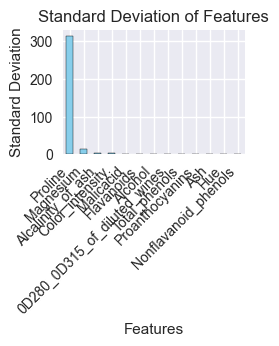

In [77]:
# 4.6 Standard deviation of features
plt.subplot(3, 3, 6)
feature_std = X.std().sort_values(ascending=False)
feature_std.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')

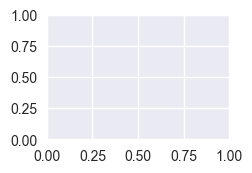

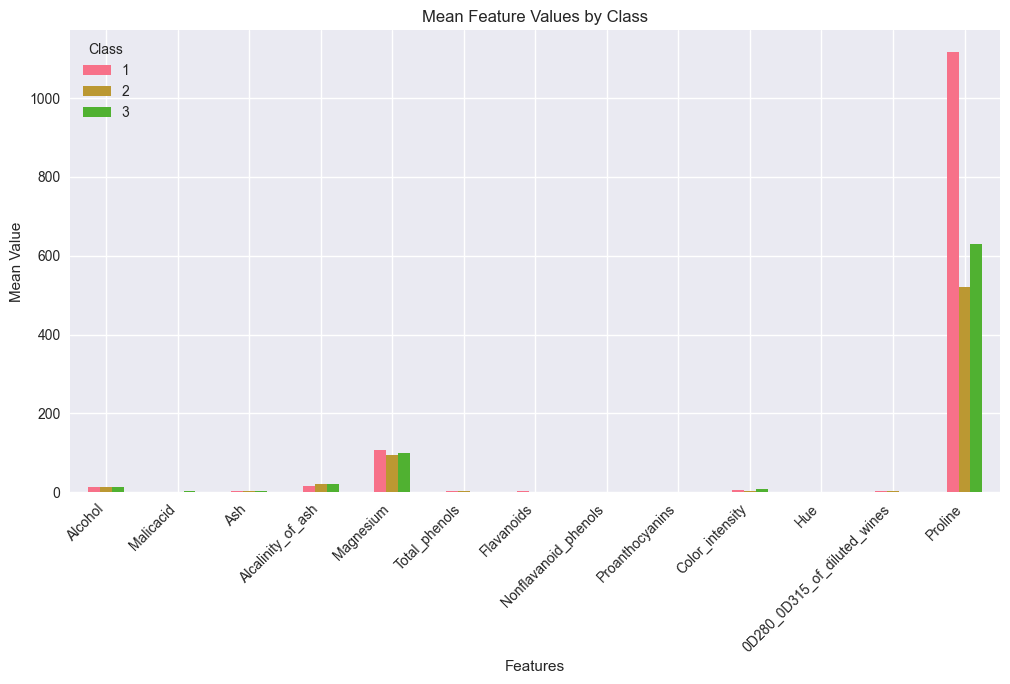

In [78]:
# 4.7 Mean values by class
plt.subplot(3, 3, 7)
class_means = df.groupby('target').mean().T
class_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Feature Values by Class')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malicacid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Alcalinity_of_ash')])

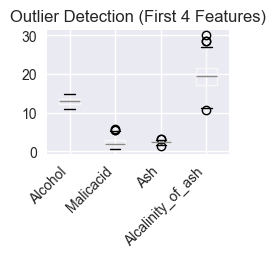

In [79]:
# 4.8 Outlier detection using boxplot
plt.subplot(3, 3, 8)
# Use a subset of features for better visualization
selected_features = X.columns[:4]  # First 4 features
X[selected_features].boxplot()
plt.title('Outlier Detection (First 4 Features)')
plt.xticks(rotation=45, ha='right')

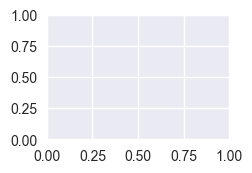

In [80]:
# 4.9 PCA visualization (2D projection)
plt.subplot(3, 3, 9)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


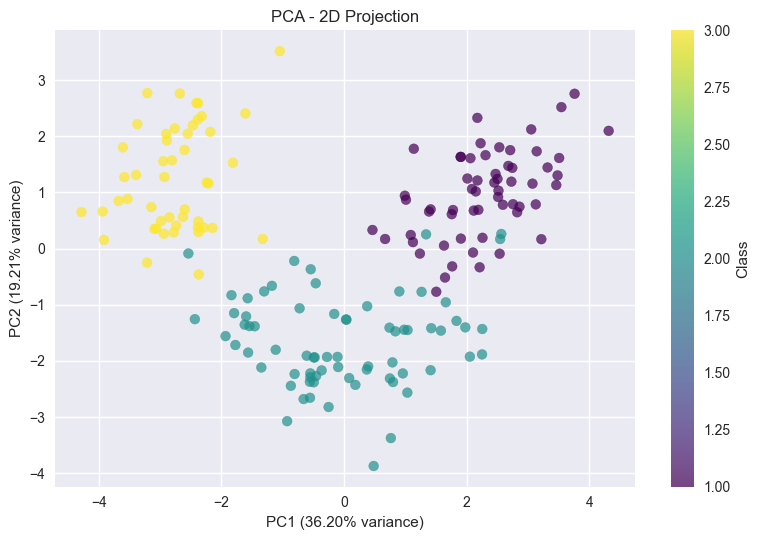

In [81]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y['class'], 
                     cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Class')
plt.title('PCA - 2D Projection')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.tight_layout()
plt.show()


4. ADDITIONAL INSIGHTS
Top features correlated with target:
target                  1.000000
Alcalinity_of_ash       0.517859
Nonflavanoid_phenols    0.489109
Malicacid               0.437776
Color_intensity         0.265668
Ash                    -0.049643
Name: target, dtype: float64

Bottom features correlated with target:
Proanthocyanins                -0.499130
Hue                            -0.617369
Proline                        -0.633717
Total_phenols                  -0.719163
0D280_0D315_of_diluted_wines   -0.788230
Flavanoids                     -0.847498
Name: target, dtype: float64

High correlations (|r| > 0.7):
Total_phenols                 Flavanoids                      0.864564
Flavanoids                    Total_phenols                   0.864564
                              target                          0.847498
target                        Flavanoids                      0.847498
0D280_0D315_of_diluted_wines  target                          0.788230
target   

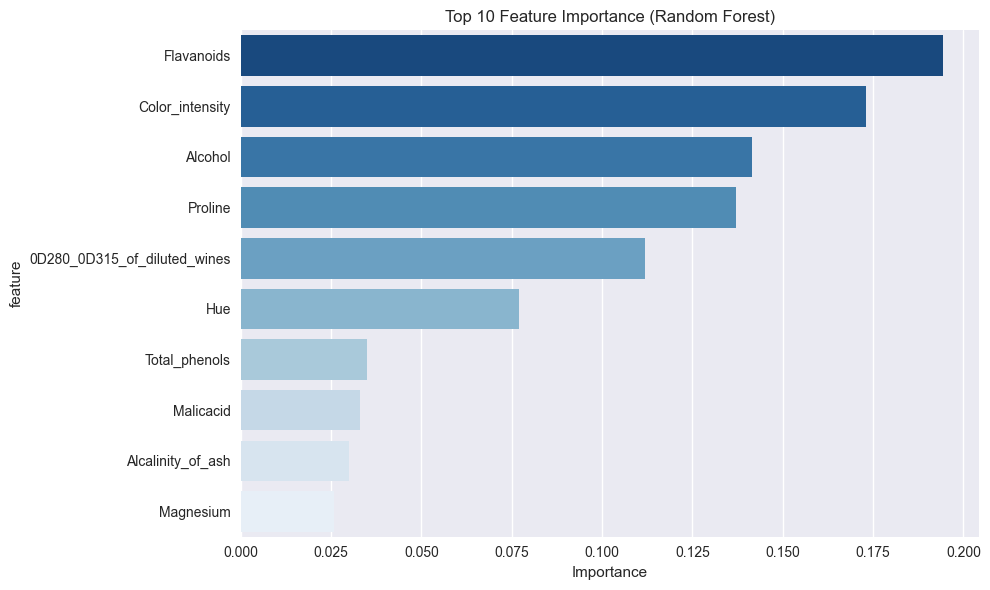


EDA COMPLETED - KEY FINDINGS:
1. Dataset is complete with no missing values
2. Three classes with relatively balanced distribution
3. Features show different scales - scaling recommended
4. Some features are highly correlated with target variable
5. Potential outliers present in some features
6. PCA shows good class separation in lower dimensions


In [82]:
# 5. Additional Analysis
print("\n4. ADDITIONAL INSIGHTS")
print("="*40)

# Correlation with target
target_corr = df.corr()['target'].sort_values(ascending=False)
print("Top features correlated with target:")
print(target_corr.head(6))
print("\nBottom features correlated with target:")
print(target_corr.tail(6))

# Check for multicollinearity
print(f"\nHigh correlations (|r| > 0.7):")
high_corr = correlation_matrix.abs()
high_corr = high_corr.unstack()
high_corr = high_corr[high_corr > 0.7]
high_corr = high_corr[high_corr < 1]  # Remove self-correlations
print(high_corr.sort_values(ascending=False))

# Feature importance using random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y.values.ravel())
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 most important features (Random Forest):")
print(feature_importance.head(5))

# Create feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10), 
            palette='Blues_r')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("EDA COMPLETED - KEY FINDINGS:")
print("="*60)
print("1. Dataset is complete with no missing values")
print("2. Three classes with relatively balanced distribution")
print("3. Features show different scales - scaling recommended")
print("4. Some features are highly correlated with target variable")
print("5. Potential outliers present in some features")
print("6. PCA shows good class separation in lower dimensions")
print("="*60)

## 3. Realizar o pré-processamento dos dados tratando atributos to tipo object, valores nulos, normalização e redução de dimensionalidade

In [ ]:
has_any_nulls = X.isnull().any().any()
print(f"Há algum valor nulo no dataset? {has_any_nulls}")

Há algum valor nulo no dataset? False


In [50]:
atributos_object = X.dtypes == 'object'
atributos_object = X.columns[atributos_object]
print(f"Há algum atributo do tipo object no dataset? {atributos_object}")

Há algum atributo do tipo object no dataset? Index([], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler # normalizando os dados

for atributo in X.columns:
    X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])

/var/folders/hc/bkx75gln73s3s39y8r1820d80000gn/T/ipykernel_98626/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/var/folders/hc/bkx75gln73s3s39y8r1820d80000gn/T/ipykernel_98626/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/var/folders/hc/bkx75gln73s3s39y8r1820d80000gn/T/ipykernel_98626/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

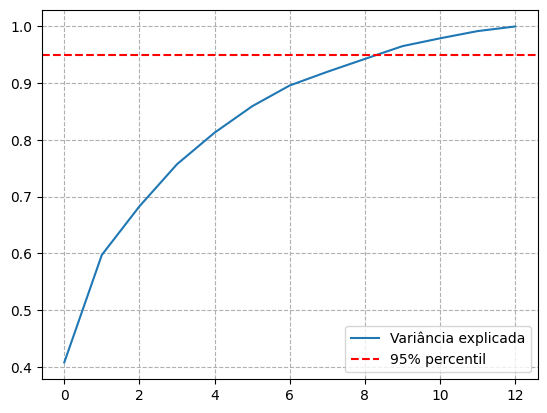

In [52]:
from sklearn.decomposition import PCA # reduzindo a dimensionalidade
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

## 4. Fazer o split dos dados para treino e teste


## 5. Treinar quatro classificadores diferentes ajustantando seus hiperparâmetros utilizando validação cruzada. Utilize o ray para distribuir o processamento para encontrar os melhores hiperparametros para cada classificador


## 6. Gerar visualizações para as seguintes métricas de acurácia, precision e recall


## 7. Gerar a matriz de confusão para cada classificador


## 8. Plotar as regiões de decisão para os classificadores
